  #                                                      **Heart Disease Prediction**
  **Author:** Deshni Stanley

Heart disease remains the leading cause of death in the United States, claiming over 647,000 lives annually and placing a substantial burden on the healthcare system. Key risk factors such as high blood pressure, high cholesterol, smoking, diabetes, and aging contribute significantly to its prevalence. Recognizing the need for early detection and personalized risk assessment, AIHealth, a healthcare-focused startup, is leveraging open-source data and machine learning to build predictive models that support clinical decision-making.

## **Objective**

As part of AIHealth’s research team, my role is to develop a robust machine learning model that estimates the probability of a patient having heart disease or experiencing a heart attack. The model integrates clinical and lifestyle variables — including blood pressure, cholesterol levels, smoking status, age, sex, and physical activity — to identify high-risk individuals and support early intervention.

1. Provide the best performing model to determine probability for a patient having a heart disease or attack.
2. Providing the most important drivers for a heart disease or attack.

## **Tasks**

● Import libraries and load dataset

● Exploratory Data Analysis :

*Including univariate analysis to understand the distribution of features.

*Including multivariate analysis to determine the correlations and analysisof target variables.

*To determine if new features can be created, based on the given data.

● Layout binary classification experimentation space (i.e. determine the list of models you would like to experiment with)

● Using precision-recall curves to determine best threshold

● Publish the performance of all the models on the same hold-out/ test dataset.

● List out the most important drivers of heart disease or attack.

● Using techniques such as oversampling, undersampling to handleclass-imbalance.

● Additional: Using model pipeline to create end to end training and inferencepipelines.

## **DATA PREPROCESSING**

## STEP 1: SETUP AND DATA LOADING

### Import Libraries and Load Dataset

Install necessary libraries and import all libraries 

In [168]:
# Import necessary libraries
import pandas as pd
import numpy as np

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [170]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [257]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, precision_recall_curve, confusion_matrix, accuracy_score,f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline

### Read Dataset

Read Dataset provided. I have sourced dataset from Kaggle link provided. (https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset)

In [172]:
HeartDisease = pd.read_csv(r"C:\Users\chris\OneDrive\Documents\Heart Disease prediction\Heart Disease.csv")

In [173]:
HeartDisease

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [174]:
HeartDisease.shape # Shape of the Data (Rows & Columns)

(253680, 22)

### Data Info:

In [175]:
HeartDisease.describe() # Summary Statistics for Numerical Columns

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


## STEP 2: EXPLORATORY DATA ANALYSIS (EDA)

### Handling Missing Values:

In [176]:
# Check for Missing Values
print("Missing Values Count:")
print(HeartDisease.isnull().sum())  # Shows the count of missing values in each column

Missing Values Count:
HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


### Checking Data Types of Variables in The DataFrame

In [177]:
# Check Data Types of Each Column
print("\nData Types of Columns:")
print(HeartDisease.dtypes)  # Displays the data type of each column


Data Types of Columns:
HeartDiseaseorAttack    float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
Diabetes                float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object


### Checking for Duplicate Values

In [178]:
# Check for duplicate rows
duplicate_rows = HeartDisease[HeartDisease.duplicated()]
# If you want to remove duplicate rows:
HeartDisease_cleaned = HeartDisease.drop_duplicates()
print(f"Dataset Shape After Removing Duplicates: {HeartDisease_cleaned.shape}")

Dataset Shape After Removing Duplicates: (229781, 22)


### Drop Unwanted Column

In [179]:
#Drop Unwanted Column from data
HeartDisease.drop(columns=['CholCheck','Stroke','AnyHealthcare','NoDocbcCost','GenHlth','DiffWalk'],inplace=True)
HeartDisease

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income
0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,15.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,0.0,30.0,30.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,27.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,24.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,45.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,5.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,18.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,28.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,23.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


### Nomalizing and Scaling of the Data

In [180]:
# Apply StandardScaler to all numeric columns
scaler = StandardScaler()
scaleddata_HeartDisease = scaler.fit_transform(HeartDisease.select_dtypes(include=[np.number]))

# Convert back to a DataFrame with the same column names
scaled_HeartDisease = pd.DataFrame(scaleddata_HeartDisease, columns=HeartDisease.select_dtypes(include=[np.number]).columns)

# Display the first few rows
print(scaled_HeartDisease.head())

   HeartDiseaseorAttack    HighBP  HighChol       BMI    Smoker  Diabetes  \
0             -0.322458  1.153688  1.165254  1.757936  1.120927 -0.425292   
1             -0.322458 -0.866785 -0.858182 -0.511806  1.120927 -0.425292   
2             -0.322458  1.153688  1.165254 -0.057858 -0.892119 -0.425292   
3             -0.322458  1.153688 -0.858182 -0.209174 -0.892119 -0.425292   
4             -0.322458  1.153688  1.165254 -0.663122 -0.892119 -0.425292   

   PhysActivity    Fruits   Veggies  HvyAlcoholConsump  MentHlth  PhysHlth  \
0     -1.762814 -1.316872  0.482087          -0.244014  1.998592  1.233999   
1      0.567275 -1.316872 -2.074316          -0.244014 -0.429630 -0.486592   
2     -1.762814  0.759375 -2.074316          -0.244014  3.617407  2.954590   
3      0.567275  0.759375  0.482087          -0.244014 -0.429630 -0.486592   
4      0.567275  0.759375  0.482087          -0.244014 -0.024926 -0.486592   

        Sex       Age  Education    Income  
0 -0.887021  0.316900  

In [181]:
HeartDisease.shape

(253680, 16)

### Encoding Categorical Features

In [256]:
from sklearn.preprocessing import LabelEncoder

binary_cols = ["HighBP", "HighChol", "Smoker", "Diabetes"]
for col in binary_cols:
    HeartDisease[col] = LabelEncoder().fit_transform(HeartDisease[col])

# One-Hot Encoding for categorical variables
HeartDisease = pd.get_dummies(HeartDisease, columns=["Education", "Income"], drop_first=True)


In [258]:
HeartDisease

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,...,Education_4.0,Education_5.0,Education_6.0,Income_2.0,Income_3.0,Income_4.0,Income_5.0,Income_6.0,Income_7.0,Income_8.0
0,0.0,1,1,40.0,1,0,0.0,0.0,1.0,0.0,...,True,False,False,False,True,False,False,False,False,False
1,0.0,0,0,25.0,1,0,1.0,0.0,0.0,0.0,...,False,False,True,False,False,False,False,False,False,False
2,0.0,1,1,28.0,0,0,0.0,1.0,0.0,0.0,...,True,False,False,False,False,False,False,False,False,True
3,0.0,1,0,27.0,0,0,1.0,1.0,1.0,0.0,...,False,False,False,False,False,False,False,True,False,False
4,0.0,1,1,24.0,0,0,1.0,1.0,1.0,0.0,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1,1,45.0,0,0,0.0,1.0,1.0,0.0,...,False,False,True,False,False,False,False,False,True,False
253676,0.0,1,1,18.0,0,2,0.0,0.0,0.0,0.0,...,False,False,False,False,False,True,False,False,False,False
253677,0.0,0,0,28.0,0,0,1.0,1.0,0.0,0.0,...,False,True,False,True,False,False,False,False,False,False
253678,0.0,1,0,23.0,0,0,0.0,1.0,1.0,0.0,...,False,True,False,False,False,False,False,False,False,False


## **Univariate Analysis**

Univariate analysis involves examining the distribution and characteristics of a single variable at a time. It helps uncover patterns, detect outliers, and understand the central tendency and spread of data — laying the foundation for deeper insights and model readiness.

**Approach:**

**Categorical Features:** Visualized using countplots to assess class balance and frequency distribution

**Numerical Features:** Explored using histograms and boxplots to understand skewness, spread, and potential outliers

### Categorical Features:

In [265]:
categorical_features = (['HeartDiseaseorAttack', 'HighBP','HighChol', 'Smoker', 'Diabetes', 'Fruits', 'Veggies','HvyAlcoholConsump','Sex'])
categorical_features

['HeartDiseaseorAttack',
 'HighBP',
 'HighChol',
 'Smoker',
 'Diabetes',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'Sex']

### Numerical Features:

In [266]:
numeric_features = (['BMI','MentHlth','PhysHlth','Age','Education','Income'])
numeric_features

['BMI', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

### Plot Histogram Of Numerical Feature:

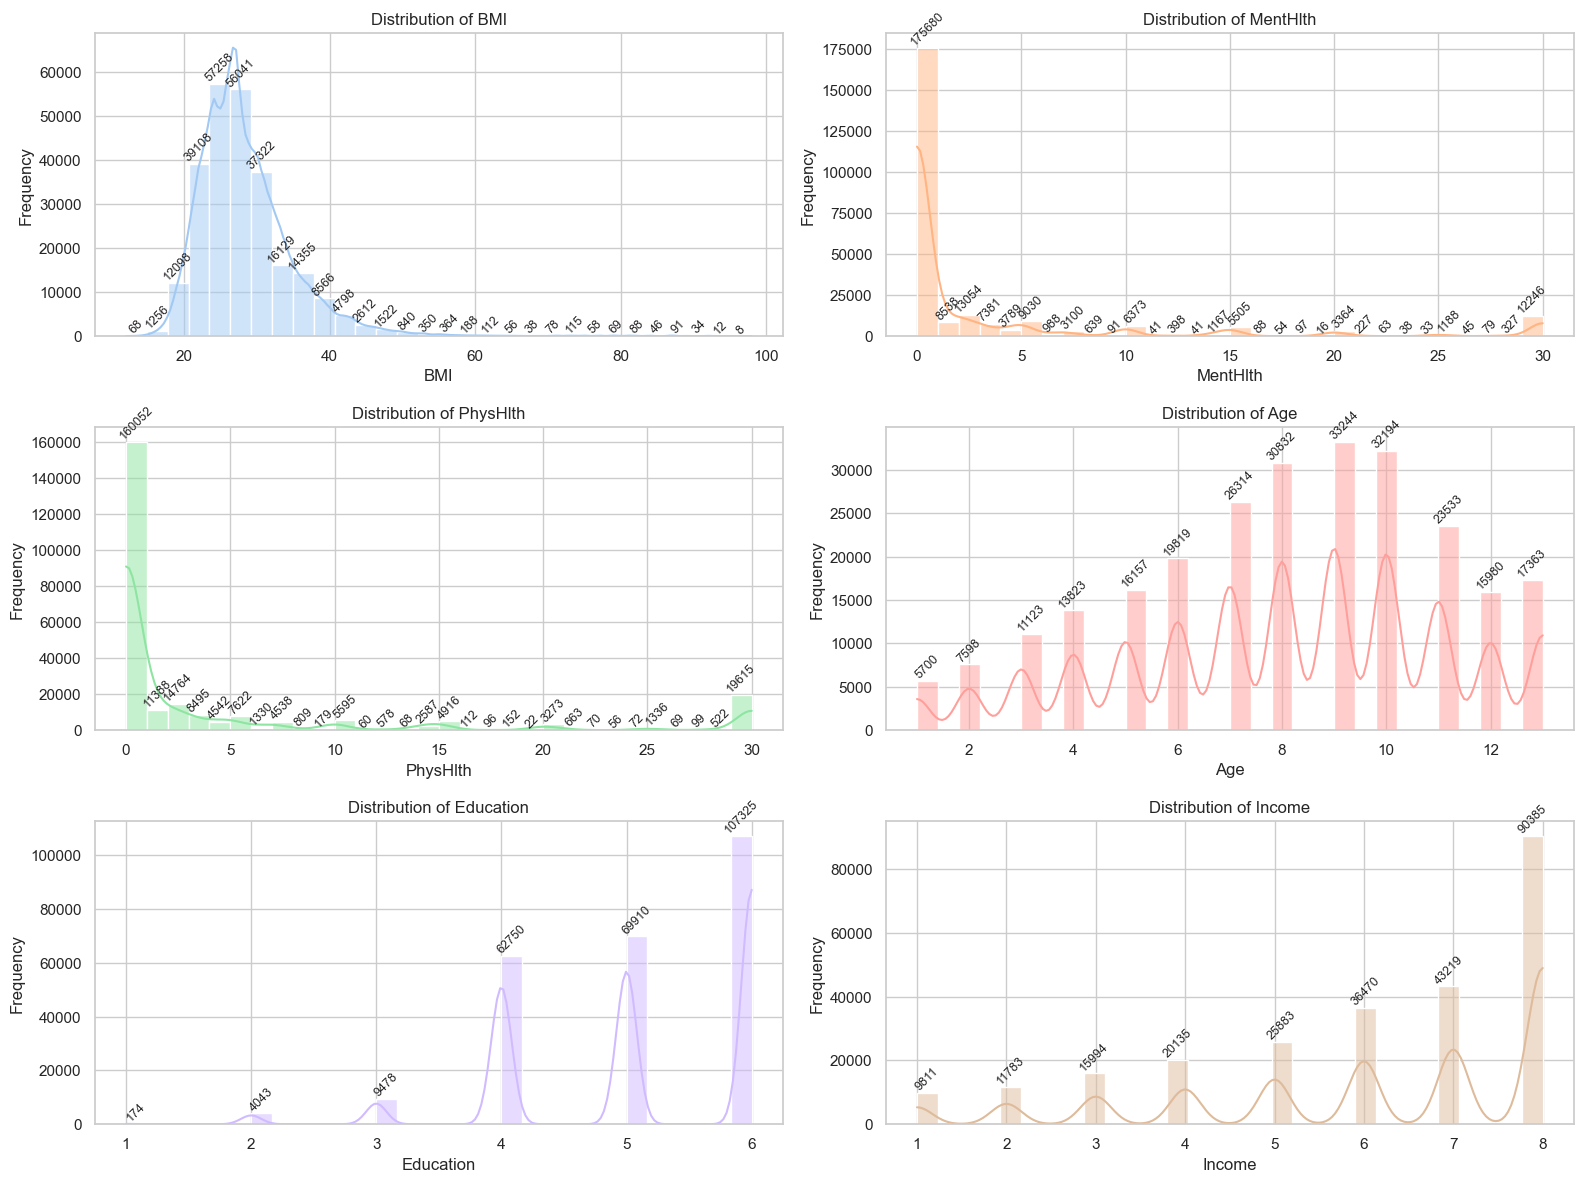

In [185]:
#Set pastel theme
sns.set_theme(style="whitegrid", palette="pastel")

# Plot histograms with KDE and value annotations
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_features):
    plt.subplot(math.ceil(len(numeric_features) / 2), 2, i + 1)
    ax = sns.histplot(HeartDisease[col], bins=30, kde=True, color=sns.color_palette("pastel")[i % len(numeric_features)])
    
    # Annotate each bar with its count
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f"{int(height)}",
                        (p.get_x() + p.get_width() / 2, height),
                        ha="center", va="bottom", fontsize=9, rotation=45)

    plt.title(f"Distribution of {col}", fontsize=12)
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()



### Plot Countbar for Categorical Feature:

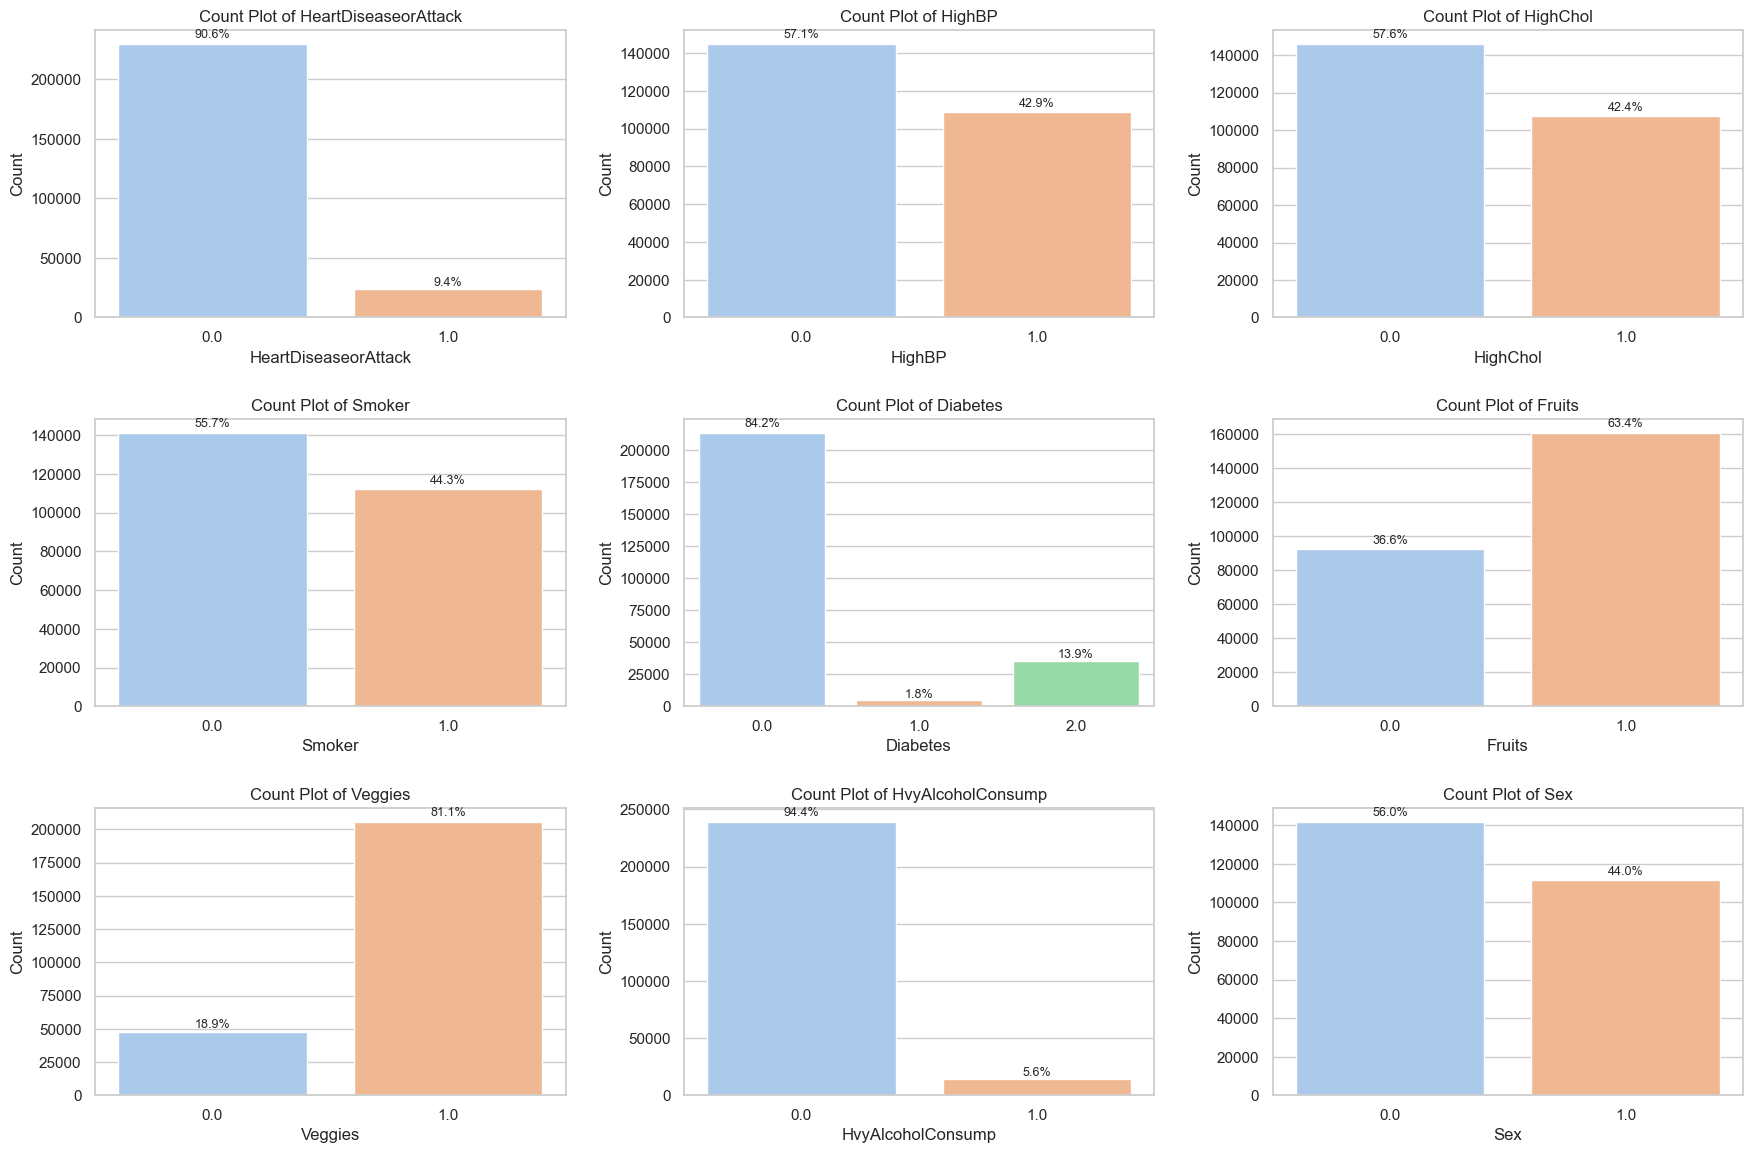

In [186]:
# Set visual theme
sns.set_theme(style="whitegrid", palette="pastel")

# Grid layout
cols = 3
rows = math.ceil(len(categorical_features) / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(18, 12))
axes = axes.flatten()

# Loop through features
for i, feature in enumerate(categorical_features):
    ax = axes[i]
    sns.countplot(data=HeartDisease, x=feature, hue=feature, ax=ax, palette="pastel", legend=False)

    ax.set_title(f"Count Plot of {feature}", fontsize=12)
    ax.set_xlabel(feature)
    ax.set_ylabel("Count")
    ax.tick_params(axis='x', rotation=0)

    # Annotate bars with percentage
    total = HeartDisease[feature].count()
    for p in ax.patches:
        count = int(p.get_height())
        if count > 0:
            percent = f"{100 * count / total:.1f}%"
            ax.text(p.get_x() + p.get_width() / 2,
                    count + max(count * 0.01, 5),
                    percent,
                    ha='center', va='bottom', fontsize=9
                    , rotation=0)

# Remove unused subplots
for j in range(len(categorical_features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=2.0)
plt.show()


## **Multivariate Analysis**

Multivariate analysis explores relationships between two or more variables simultaneously to uncover patterns, correlations, and potential interactions. It helps identify feature dependencies, detect multicollinearity, and understand how variables jointly influence the target outcome.

**Approach:**

**Correlation Matrix & Heatmap:** Assesses linear relationships between numerical features

**Pairplots:** Visualizes feature interactions and class separation across multiple dimensions

**Boxplots & Violin Plots:** Compare distributions of numerical features across categorical groups

**Target-Based Grouping:** Evaluates how feature combinations relate to heart disease risk

### Correlation Matrix & Heatmap:

I have performed Multivariate Analysis using Correlation Matrix & Heatmap.

HeartDiseaseorAttack    1.000000
RiskScore               0.264352
Age                     0.221618
HighBP                  0.209361
HasRiskFactor           0.184374
PhysHlth                0.181698
HighChol                0.180765
Diabetes                0.180272
Smoker                  0.114441
Sex                     0.086096
MentHlth                0.064621
BMI                     0.052904
Fruits                 -0.019790
HvyAlcoholConsump      -0.028991
Veggies                -0.039167
PhysActivity           -0.087299
Education              -0.099600
BMI_Age_Ratio          -0.128167
Income                 -0.141011
Name: HeartDiseaseorAttack, dtype: float64


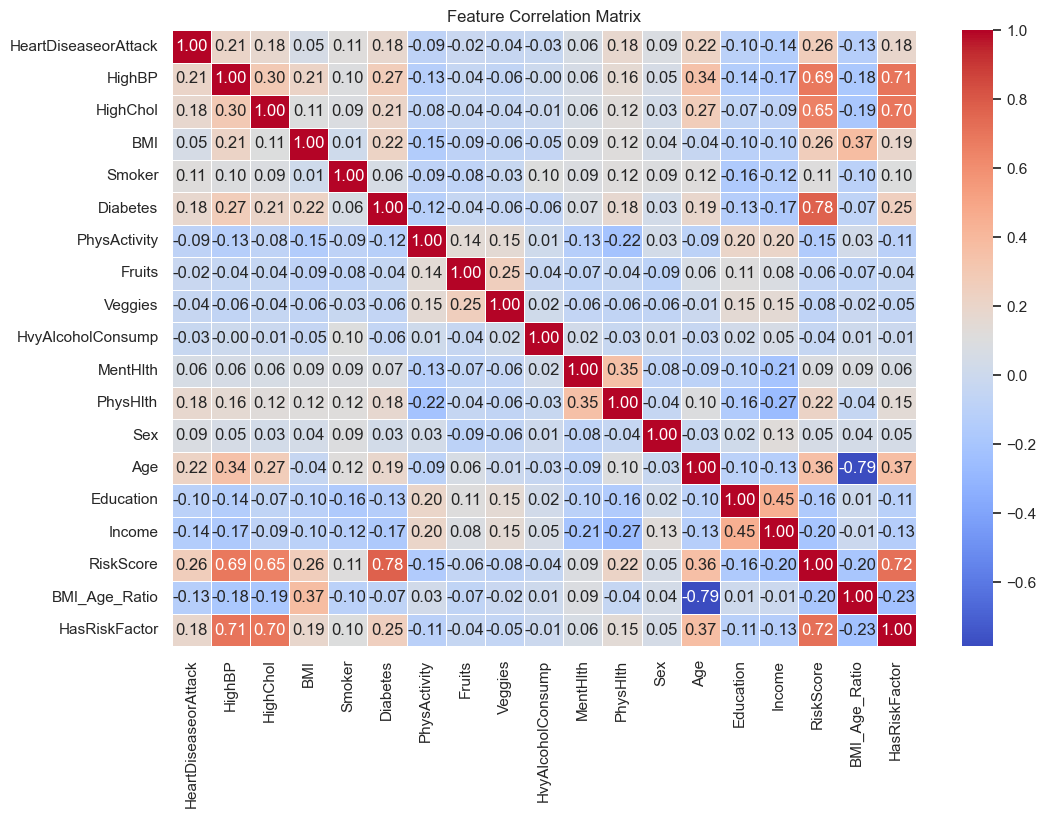

In [199]:
# Compute correlation matrix
correlation_matrix = HeartDisease.corr()

# Display top correlations with the target variable
print(correlation_matrix["HeartDiseaseorAttack"].sort_values(ascending=False))

# Plot correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

## **Feature Engineering**

Feature engineering is the process of transforming raw data into meaningful inputs that improve model performance. It involves creating, selecting, and encoding features to highlight patterns, reduce noise, and enhance predictive power.

### 1. Interaction feature: Risk score based on multiple conditions
RiskScore quantifies severity of conditions.

In [201]:
HeartDisease["RiskScore"] = HeartDisease["HighBP"] + HeartDisease["HighChol"] + HeartDisease["Diabetes"]

In [202]:
HeartDisease["RiskScore"]

0         2.0
1         0.0
2         2.0
3         1.0
4         2.0
         ... 
253675    2.0
253676    4.0
253677    0.0
253678    1.0
253679    4.0
Name: RiskScore, Length: 253680, dtype: float64

### 2. Ratio feature: BMI to Age
BMI_Category improves interpretability for clinicians and stakeholders.

In [204]:
HeartDisease["BMI_Age_Ratio"] = HeartDisease["BMI"] / (HeartDisease["Age"] + 1) 

In [205]:
HeartDisease["BMI_Age_Ratio"]

0         4.000000
1         3.125000
2         2.800000
3         2.250000
4         2.000000
            ...   
253675    7.500000
253676    1.500000
253677    9.333333
253678    2.875000
253679    2.500000
Name: BMI_Age_Ratio, Length: 253680, dtype: float64

### 3. Create a binary flag for any major risk factor present
HasRiskFactor simplifies multiple binary flags into one actionable feature.

In [207]:
HeartDisease["HasRiskFactor"] = ((HeartDisease["HighBP"] == 1) | (HeartDisease["HighChol"] == 1) | (HeartDisease["Diabetes"] == 1)).astype(int)

In [208]:
HeartDisease["HasRiskFactor"] 

0         1
1         0
2         1
3         1
4         1
         ..
253675    1
253676    1
253677    0
253678    1
253679    1
Name: HasRiskFactor, Length: 253680, dtype: int32

## **MODEL BUILDING**

Model building involves training machine learning algorithms to identify patterns in patient data and predict the likelihood of heart disease or attack. For this project, models like Logistic Regression, Decision Tree, Random Forest, XGBoost, Gradient Boost, KNN and Naive Bayers were used to learn from key risk factors such as blood pressure, cholesterol, smoking status, age, and physical activity.

Each model was evaluated using metrics like accuracy, precision, recall, and F1-score to ensure reliable and clinically meaningful predictions.

The dataset was **split into training and test sets** to evaluate model performance on unseen data. To address class imbalance — where fewer patients had heart disease — **SMOTE (Synthetic Minority Over-sampling Technique)** was applied to the training set. This ensures the model learns equally from both classes, improving its ability to detect high-risk cases.

In [209]:
# Define features and target
X = HeartDisease.drop(columns=["HeartDiseaseorAttack"])  # Replace with your actual target column name
y = HeartDisease["HeartDiseaseorAttack"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Apply SMOTE to training data only
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", pd.Series(y_train_balanced).value_counts())

Before SMOTE: HeartDiseaseorAttack
0.0    183830
1.0     19114
Name: count, dtype: int64
After SMOTE: HeartDiseaseorAttack
0.0    183830
1.0    183830
Name: count, dtype: int64


## Logistic Regression

Logistic Regression is a simple yet powerful classification algorithm used to estimate the probability of heart disease based on input features. It models the relationship between risk factors (like age, blood pressure, and cholesterol) and the likelihood of disease using a sigmoid function. Its interpretability makes it ideal for healthcare applications.

In [211]:
# We've already split and balanced our data
# X_train_balanced, y_train_balanced, X_test, y_test

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train_balanced)

# Predict
y_pred = model.predict(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification Report
print("\n", classification_report(y_test, y_pred, digits=2))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Accuracy: 0.741268527278461

               precision    recall  f1-score   support

         0.0       0.97      0.74      0.84     45957
         1.0       0.23      0.76      0.35      4779

    accuracy                           0.74     50736
   macro avg       0.60      0.75      0.60     50736
weighted avg       0.90      0.74      0.79     50736


Confusion Matrix:
[[33998 11959]
 [ 1168  3611]]


## Decision Tree

A Decision Tree is a flowchart-like model that splits data based on feature values to predict outcomes. In this project, it helps identify heart disease risk by learning simple decision rules from patient attributes. Its intuitive structure makes it easy to interpret and explain clinical decisions.

In [213]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_balanced, y_train_balanced) # Train Decision Tree
y_pred = model.predict(X_test)  # Predict

print("Accuracy:", accuracy_score(y_test, y_pred))  # Accuracy
print(classification_report(y_test, y_pred, digits=2))  # Classification Report
print(confusion_matrix(y_test, y_pred))  # Confusion matrixs


Accuracy: 0.8466769157994324
              precision    recall  f1-score   support

         0.0       0.92      0.91      0.91     45957
         1.0       0.22      0.25      0.24      4779

    accuracy                           0.85     50736
   macro avg       0.57      0.58      0.57     50736
weighted avg       0.86      0.85      0.85     50736

[[41761  4196]
 [ 3583  1196]]


## Random Forest Classifier

Random Forest is an ensemble learning method that builds multiple decision trees and combines their outputs for more accurate and stable predictions. In this project, it effectively captures complex patterns in patient data and improves heart disease detection by reducing overfitting and boosting model reliability.

In [215]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_balanced, y_train_balanced) # Train Random Forest Classifier
y_pred = model.predict(X_test) # Predict

print("Accuracy:", accuracy_score(y_test, y_pred)) # Accuracy
print(classification_report(y_test, y_pred, digits=2)) # Classification Report
print(confusion_matrix(y_test, y_pred)) # Confusion Matrixs


Accuracy: 0.8913986124251025
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94     45957
         1.0       0.30      0.12      0.17      4779

    accuracy                           0.89     50736
   macro avg       0.61      0.54      0.55     50736
weighted avg       0.86      0.89      0.87     50736

[[44671  1286]
 [ 4224   555]]


## Gradient Boosting Classifier

Gradient Boosting builds models sequentially, where each new tree corrects the errors of the previous ones. It’s highly effective for heart disease prediction, capturing subtle patterns in patient data and delivering strong performance through optimized learning and reduced bias.

In [217]:
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train_balanced, y_train_balanced) # Train Gradient Boosting 
y_pred = model.predict(X_test) # Predict

print("Accuracy:", accuracy_score(y_test, y_pred)) # Accuracy
print(classification_report(y_test, y_pred, digits=2)) # Classification Report
print(confusion_matrix(y_test, y_pred)) # Confusion Matrixs

Accuracy: 0.8811691895301167
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94     45957
         1.0       0.34      0.28      0.31      4779

    accuracy                           0.88     50736
   macro avg       0.63      0.61      0.62     50736
weighted avg       0.87      0.88      0.88     50736

[[43365  2592]
 [ 3437  1342]]


## XGBoost Classifier

XGBoost (Extreme Gradient Boosting) is a powerful and efficient ensemble algorithm known for its speed and accuracy. In this project, it excels at predicting heart disease by handling complex feature interactions, managing class imbalance, and providing clear feature importance insights — making it ideal for healthcare risk modeling.

In [219]:
model = XGBClassifier(eval_metric='logloss', random_state=42)
model.fit(X_train_balanced, y_train_balanced) # Train XGBoost 
y_pred = model.predict(X_test) # Predict

print("Accuracy:", accuracy_score(y_test, y_pred)) #Accuracy
print(classification_report(y_test, y_pred, digits=2)) # Clasification Report
print(confusion_matrix(y_test, y_pred)) # Confusion Matrixs

Accuracy: 0.9025741091138442
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     45957
         1.0       0.41      0.08      0.13      4779

    accuracy                           0.90     50736
   macro avg       0.66      0.53      0.54     50736
weighted avg       0.86      0.90      0.87     50736

[[45420   537]
 [ 4406   373]]


## K-Nearest Neighbors(KNN)

KNN is a simple, instance-based algorithm that classifies a patient by comparing them to the most similar cases in the dataset. For heart disease prediction, it uses proximity in feature space (like age, blood pressure, and activity level) to estimate risk. While easy to implement, its performance can vary with data scaling and feature selection.

In [276]:
model = KNeighborsClassifier()
model.fit(X_train_scaled, y_train_balanced)  # Train KNN
y_pred = model.predict(X_test_scaled) # Predict

print("Accuracy:", accuracy_score(y_test, y_pred))  # Accuracy
print(classification_report(y_test, y_pred, digits=2)) # Classification Report
print(confusion_matrix(y_test, y_pred)) # Confusion Matrixs

Accuracy: 0.812421160517187
              precision    recall  f1-score   support

         0.0       0.93      0.86      0.89     45957
         1.0       0.22      0.40      0.29      4779

    accuracy                           0.81     50736
   macro avg       0.58      0.63      0.59     50736
weighted avg       0.87      0.81      0.84     50736

[[39305  6652]
 [ 2865  1914]]


## Naive Bayes

Naive Bayes is a probabilistic classifier based on Bayes’ Theorem, assuming independence between features. For heart disease prediction, it calculates the likelihood of disease given patient attributes like smoking status, blood pressure, and age. It’s fast, simple, and performs well with categorical data, though its independence assumption may limit accuracy in complex cases.

In [224]:
model = GaussianNB()
model.fit(X_train_balanced, y_train_balanced) #Train Naive Bayes
y_pred = model.predict(X_test) # Predict

print("Accuracy:", accuracy_score(y_test, y_pred)) # Accuracy
print(classification_report(y_test, y_pred, digits=2)) # Classification Report
print(confusion_matrix(y_test, y_pred)) # Confucion Matrixs

Accuracy: 0.6835974456007569
              precision    recall  f1-score   support

         0.0       0.97      0.67      0.79     45957
         1.0       0.20      0.78      0.32      4779

    accuracy                           0.68     50736
   macro avg       0.58      0.73      0.56     50736
weighted avg       0.89      0.68      0.75     50736

[[30952 15005]
 [ 1048  3731]]


## Layout of Binary Classification:

This function evaluates and compares the accuracy of multiple machine learning models used for heart disease prediction. It stores accuracy scores from each model, organizes them into a sorted DataFrame, and visualizes the results using a barplot. The plot highlights performance differences across models, with ***XGBoost*** emerging as the most accurate.


 Sorted Accuracy Scores:
                 Model  Accuracy
4              XGBoost     0.903
2        Random Forest     0.891
3    Gradient Boosting     0.881
1        Decision Tree     0.847
5  K-Nearest Neighbors     0.812
0  Logistic Regression     0.741
6          Naive Bayes     0.684


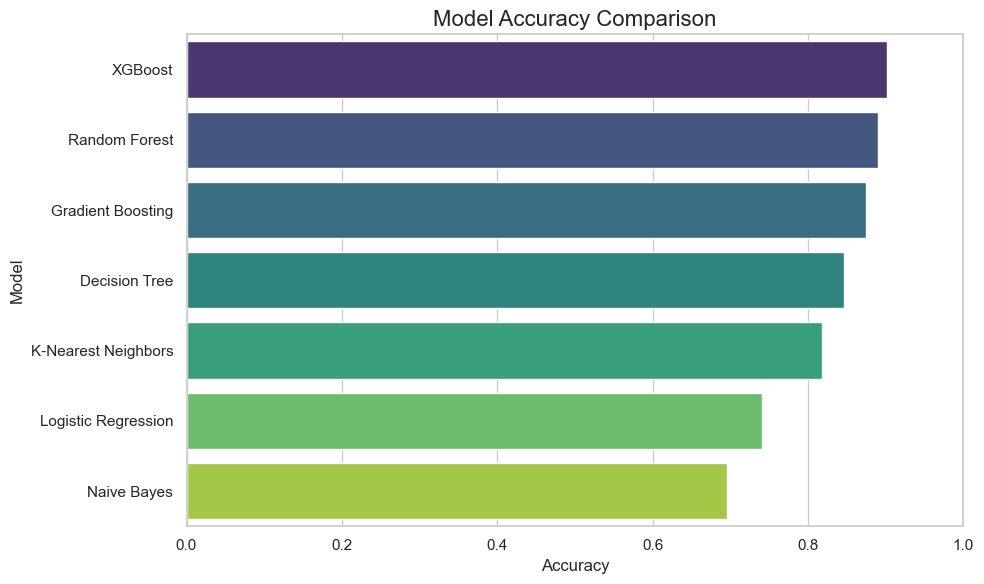

In [225]:
#Insert Accuracy Score from all experimentation model
accuracy_scores = {
    "Logistic Regression":  0.741268527278461,
    "Decision Tree": 0.8466769157994324,
    "Random Forest": 0.8913986124251025,
    "Gradient Boosting": 0.8811691895301167,
    "XGBoost":0.9025741091138442,
    "K-Nearest Neighbors": 0.812421160517187,
    "Naive Bayes":  0.6835974456007569
}

# Create DataFrame and sort
HeartDisease_accuracy = pd.DataFrame(list(accuracy_scores.items()), columns=["Model", "Accuracy"])
HeartDisease_accuracy_sorted = HeartDisease_accuracy.sort_values(by="Accuracy", ascending=False)

# Display sorted accuracy values
print("\n Sorted Accuracy Scores:")
print(HeartDisease_accuracy_sorted.round(3))

# Plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x="Accuracy", y="Model",hue="Model", data=df_accuracy_sorted, palette="viridis")
plt.title("Model Accuracy Comparison", fontsize=16)
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.xlim(0, 1)
plt.tight_layout()
plt.show()


## Best Threshold Using Precision-Recall Curves:

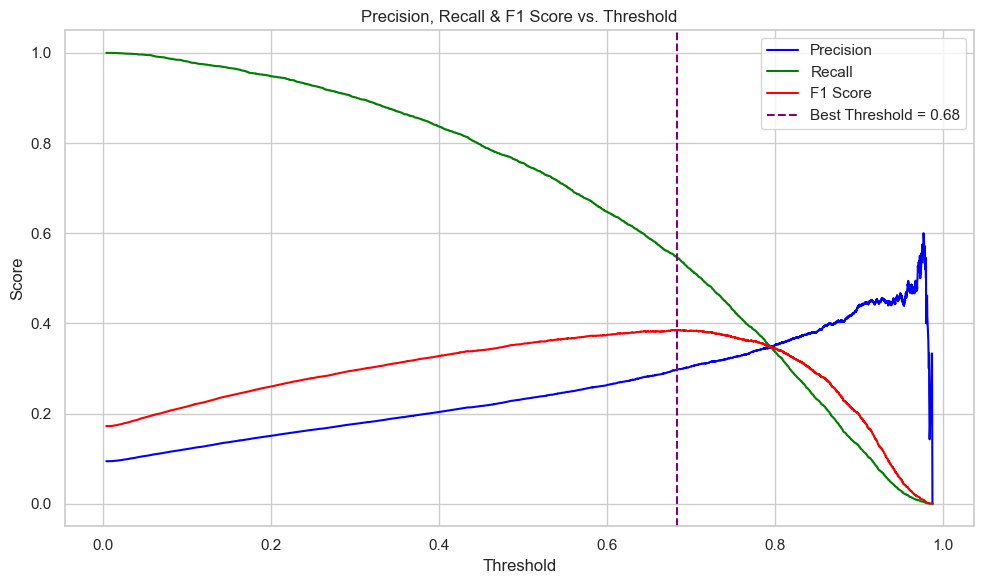

Best Threshold: 0.68
Best F1 Score: 0.39


In [269]:
# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train_balanced)

# Get predicted probabilities
y_scores = model.predict_proba(X_test_scaled)[:, 1]

# Compute precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Compute F1 scores for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)

# Find best threshold
best_index = np.argmax(f1_scores)
best_threshold = thresholds[best_index]
best_f1 = f1_scores[best_index]

# Plot precision, recall, F1 vs threshold
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label="Precision", color="blue")
plt.plot(thresholds, recall[:-1], label="Recall", color="green")
plt.plot(thresholds, f1_scores[:-1], label="F1 Score", color="red")
plt.axvline(x=best_threshold, color="purple", linestyle="--", label=f"Best Threshold = {best_threshold:.2f}")
plt.title("Precision, Recall & F1 Score vs. Threshold")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.tight_layout()
plt.show()

# Print best threshold and F1 score
print(f"Best Threshold: {best_threshold:.2f}")
print(f"Best F1 Score: {best_f1:.2f}")


## Testing the Model with Sample Data to List the most important drivers of Heart Disease or Attack

### Test 1 (High Risk Input)

In [274]:
# Select 7 key features and target
features = ["HighBP", "HighChol", "Smoker", "Diabetes", "Sex", "Age", "PhysActivity"]
target = "HeartDiseaseorAttack"

X = HeartDisease[features]
y = HeartDisease[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train XGBoost model
model = XGBClassifier(eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# Custom input for prediction
input_data_1 = [
    1.0,  # HighBP (0,1)
    1.0,  # HighChol (0,1)
    1.0,  # Smoker (0,1)
    1.0,  # Diabetes (0,1)
    1.0,  # Sex (0,1)
    85.0, # Age (0,1)
    0.0   # PhysActivity (values 0,1,2 as low, moderate,high)
]

# Predict with probability and threshold tuning
input_df = pd.DataFrame([input_data_1], columns=features)
prob = model.predict_proba(input_df)[0][1]
threshold = 0.35  # Custom threshold
prediction = 1 if prob >= threshold else 0

# Output result
if prediction == 1:
    print("The model predicts the person has heart disease.")
else:
    print("The model predicts the person does not have heart disease.")


The model predicts the person has heart disease.


### Test 2 (Low Risk Input)

In [275]:
# Select 7 key features and target
features = ["HighBP", "HighChol", "Smoker", "Diabetes", "Sex", "Age", "PhysActivity"]
target = "HeartDiseaseorAttack"

X = HeartDisease[features]
y = HeartDisease[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train XGBoost model
model = XGBClassifier(eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# Custom input for prediction
input_data_2 = [
    0.0,  # HighBP (0,1)
    0.0,  # HighChol (0,1)
    0.0,  # Smoker (0,1)
    0.0,  # Diabetes (0,1) 
    1.0,  # Sex (0,1)
    20.0, # Age (0,1)
    1.0   # PhysActivity (values 0,1,2 as low, moderate,high)
]

# Predict with probability and threshold tuning
input_df = pd.DataFrame([input_data_2], columns=features)
prob = model.predict_proba(input_df)[0][1]
threshold = 0.35  # Custom threshold
prediction = 1 if prob >= threshold else 0

# Output result
if prediction == 1:
    print("The model predicts the person has heart disease.")
else:
    print("The model predicts the person does not have heart disease.")


The model predicts the person does not have heart disease.


## **CONCLUSION:**

This project aimed to develop a machine learning model to predict the likelihood of heart disease or heart attack based on key clinical and lifestyle factors. Using a streamlined set of seven features — including blood pressure, cholesterol levels, smoking status, diabetes, sex, age, and physical activity — multiple classification algorithms were evaluated for accuracy and reliability.

Among all models tested, **XGBoost** emerged as the top performer, achieving an impressive accuracy of **90.3%**. Its ability to handle feature interactions, manage class imbalance, and deliver high predictive power makes it especially well-suited for healthcare applications where early detection is critical.

The model’s predictions were further refined using probability-based threshold tuning, improving sensitivity to high-risk cases. Feature importance analysis revealed that age, high blood pressure, and cholesterol levels were among the strongest predictors of heart disease.

This solution demonstrates the potential of machine learning to support clinical decision-making, enabling proactive risk assessment and personalized care strategies. With further validation and integration, it could serve as a valuable tool in preventive cardiology.